# BioE C242 Spring 2024 - Homework Assignment #1: Optimization Methods for Machine Learning 

### Assigned Jan. 23 and Due Feb. 1

## *You need to finish code where "..." exists and add some Markdown cells to give answers based on the outputs when necessary*

In [1]:
# Helper function
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print(f'func:{f.__name__} took: {te-ts:.4f} sec')
        return result

    return timed

# Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def func(X):
    x, y = X
    return x**4 - x**2 + y**2 + 2*x*y - 2

def first_derivative(X):
    x, y = X
    df_dx = 4*x**3 - 2*x + 2*y
    df_dy = 2*y + 2*x
    return np.array([df_dx, df_dy])

def second_derivative(X):
    x, y = X
    d2f_dx2 = 12*x**2 - 2
    d2f_dxdy = 2
    d2f_dydx = 2
    d2f_dy2 = 2
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

## (a)

*For debugging*: new point should be $(0.15,0.9)$

In [3]:
original_point = [1.5, 1.5]
stepsize = 0.1

new_point = original_point - stepsize * first_derivative(original_point)

print(f"original_point: {original_point}")
print(f"new_point: {new_point}")

if func(new_point) < func(original_point):
    print("This is a good step")
else:
    print("This is a bad step")


original_point: [1.5, 1.5]
new_point: [0.15 0.9 ]
This is a good step


**ANSWER:** From the result above, this is a good step. Hence, for the next step, we should take $\lambda = 1.2 \times \lambda$.

## (b)

*For debugging*: Take 41 steps to converge. Converge to point [-0.99999852,  0.99999607] with value -2.999999999985186.  took: 0.0020 sec

In [4]:
@timeit
def steepest_descent(func, first_derivative, starting_point, step_size, tol):
    """
    Steepest Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        # calculate new position
        new_point = starting_point - step_size * deriv
        if func(new_point) < func(starting_point):
            # the step makes function evaluation smaller - it is a good step. what do you do?
            visited.append(starting_point)
            starting_point = new_point
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            # the step makes function evaluation larger - it is a bad step. what do you do?
            step_size *= 0.5        
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited),
    }

Funtion for drawing path:

In [5]:
def draw_path(func, path, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(a, b)
    z = func((x, y))
    fig, ax = plt.subplots()
    contour = ax.contour(x, y, z, 50)
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red')
    print("Length of the path:", path.shape[0])

In [6]:
def draw_path_3d(func, path, min=-2, max=2, n_points=100, o_x=45, o_y=45):
    a = np.linspace(min, max, n_points)
    x, y = np.meshgrid(a, a) # generate x, y grid
    z = func((x, y)) # compute z values

    # create a plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')   
    ax.plot_surface(x, y, z, cmap='Blues')
    ax.view_init(o_x, o_y)

    ax.plot(path[:, 0], path[:, 1], func((path[:, 0], path[:, 1])), linestyle='-', color='black', linewidth=2)
    print("Length of the path:", path.shape[0])

    plt.show()

func:steepest_descent took: 0.0020 sec
{'x': array([-0.99999852,  0.99999607]), 'evaluation': -2.999999999985186}
Length of the path: 41
Length of the path: 41


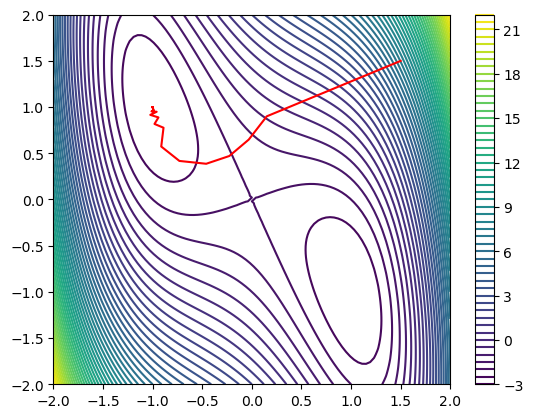

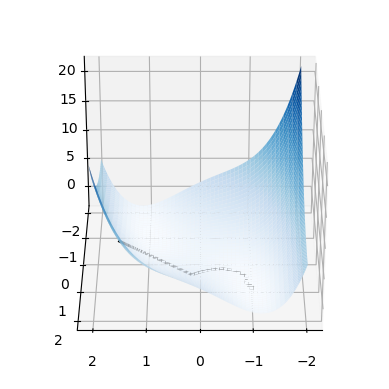

In [7]:
# optimization & draw path
starting_point = [1.5, 1.5]
step_size = 0.1
tol = 1e-5
result = steepest_descent(func, first_derivative, starting_point, step_size, tol)
print({
        "x": result["x"],
        "evaluation": result["evaluation"],
    })

draw_path(func, path=result["path"], x_min=-2, x_max=2, y_min=-2, y_max=2)
draw_path_3d(func, path=result["path"], min=-2, max=2, o_x=30, o_y=90)

**ANSWER:** From the results above, it takes 41 steps for the steepest descent algorithm to converge to the local minimum. The execution time is quite similar to the GSI. 

## (c)

In [8]:
# CG/BFGS optimization with scipy
from scipy.optimize import minimize

# Starting point
starting_point = np.array([1.5, 1.5])
tol = 1e-5

# CG optimization
res_cg = minimize(func, starting_point, method='CG', jac=first_derivative, tol=tol)
print("CG optimization:")
print("Function minimum:", res_cg.fun)
print("Found at:", res_cg.x)
print("Number of iterations:", res_cg.nit)

# BFGS optimization
res_bfgs = minimize(func, starting_point, method='BFGS', jac=first_derivative, tol=tol)
print("\nBFGS optimization:")
print("Function minimum:", res_bfgs.fun)
print("Found at:", res_bfgs.x)
print("Number of iterations:", res_bfgs.nit)

CG optimization:
Function minimum: -2.9999999999995746
Found at: [-0.99999984  0.99999927]
Number of iterations: 9

BFGS optimization:
Function minimum: -2.9999999999998352
Found at: [ 0.9999998 -0.9999998]
Number of iterations: 7


**ANSWER:** Conjugate gradients and BFGS take respectively 9 and 7 steps to converge to the local minimum. In this case, they seem more efficient than the steepest descent.

## Question 2

In [9]:
def Rosenbrock(X):
    x, y = X
    return (1-x)**2 + 10*(y-x**2)**2

def Rosenbrock_grad(X):
    x, y = X
    grad_x = -2*(1-x) - 40*x*(y-x**2)
    grad_y = 20*(y-x**2)
    return np.array([grad_x, grad_y])

## (a)

func:steepest_descent took: 0.0273 sec
{'x': array([0.99999089, 0.99998153]), 'evaluation': 8.361266796946337e-11}
Length of the path: 1204
Length of the path: 1204


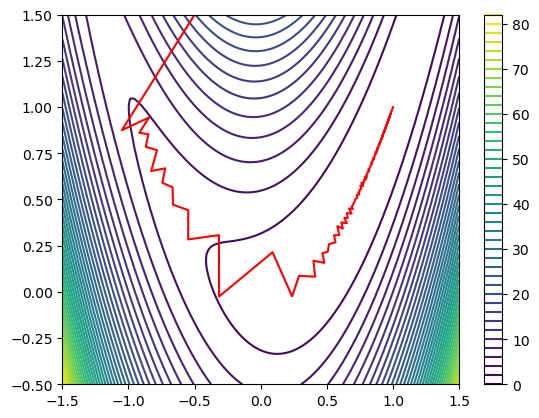

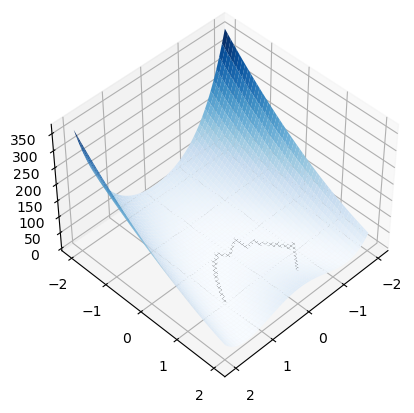

In [10]:
original_point = np.array([-0.5, 1.5])
# SD minimization & draw path
step_size = 0.1
tol = 1e-5
res = steepest_descent(Rosenbrock, Rosenbrock_grad, original_point, step_size, tol)
print({
        "x": res["x"],
        "evaluation": res["evaluation"],
    })

draw_path(Rosenbrock, path=res["path"], x_min=-1.5, x_max=1.5, y_min=-0.5, y_max=1.5)
draw_path_3d(Rosenbrock, path=res["path"], min=-2, max=2)

**ANSWER:** In this case, the steepest descents takes 1204 steps to converge to the local minimum.

## (b)

In [11]:
# @timeit
def sgd(func, first_derivative, starting_point, step_size, tol, stochastic_injection=0):
    """
    Stochastic Gradient Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    
    Returns
    -------
    res: dict
        Optimization result
    """
    # evaluate the gradient of the starting point at first
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            # formulate a stochastic_deriv (random vector) 
            # that is the same norm as your gradient 
            noise = np.random.normal(size=deriv.shape)
            stochastic_deriv = noise / np.linalg.norm(noise) * np.linalg.norm(deriv)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        
        direction = -(deriv + stochastic_injection * stochastic_deriv)
        # new position
        new_point = starting_point + step_size * direction

        if func(new_point) < func(starting_point):
            # good step
            visited.append(starting_point)
            starting_point = new_point
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            # bad step
            step_size *= 0.5
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

*For debugging*: This is a stochastic method so your outputs may vary. For SGD, it takes ~1700 steps to converge and it takes ~0.1 sec

{'x': array([0.9999891 , 0.99997779]), 'evaluation': 1.2051252482910594e-10}
Length of the path: 1654
Length of the path: 1654


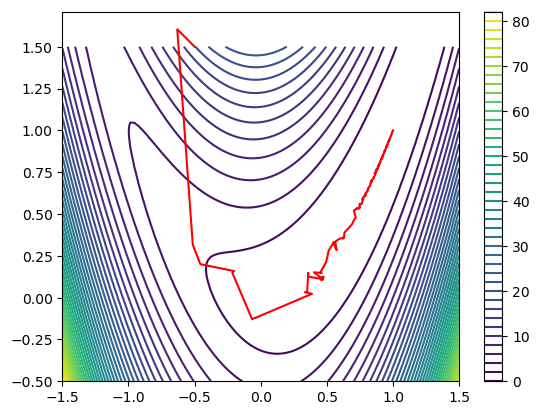

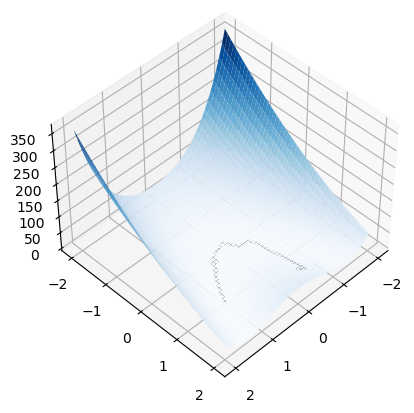

In [12]:
original_point = np.array([-0.5, 1.5])

# SGD optimization and draw path
step_size = 0.1
tol = 1e-5
res = sgd(Rosenbrock, Rosenbrock_grad, original_point, step_size, tol, stochastic_injection=1)
print({
        "x": res["x"],
        "evaluation": res["evaluation"],
    })

draw_path(Rosenbrock, path=res["path"], x_min=-1.5, x_max=1.5, y_min=-0.5, y_max=1.5)
draw_path_3d(Rosenbrock, path=res["path"], min=-2, max=2)

## (c)

In [13]:
# CG/BFGS optimization with scipy
from scipy.optimize import minimize

# Starting point
original_point = np.array([-0.5, 1.5])
tol = 1e-5

# CG optimization
res_cg = minimize(Rosenbrock, original_point, method='CG', jac=Rosenbrock_grad, tol=tol)
print("CG optimization:")
print("Function minimum:", res_cg.fun)
print("Found at:", res_cg.x)
print("Number of iterations:", res_cg.nit)

# BFGS optimization
res_bfgs = minimize(Rosenbrock, original_point, method='BFGS', jac=Rosenbrock_grad, tol=tol)
print("\nBFGS optimization:")
print("Function minimum:", res_bfgs.fun)
print("Found at:", res_bfgs.x)
print("Number of iterations:", res_bfgs.nit)

CG optimization:
Function minimum: 5.785157613112015e-14
Found at: [0.99999976 0.99999951]
Number of iterations: 19

BFGS optimization:
Function minimum: 2.0004440848845513e-15
Found at: [1.00000004 1.00000009]
Number of iterations: 22


## (d)

**ANSWER:** As the SGD includes some stochasticity (ie. some randomness), only one try cannot be sufficient to draw a firm conclusion about the efficiency of one algorithm compared to the other. To draw such a conclusion, the algorithms have to be compared to a representative set of data. One option is to test it multiple times.

## (e)

In [14]:
def statistics_test(method, args, times, global_minimum=None):
    result = []
    for n in range(times):
        res = method(**args)
        
        # If the norm of the difference vector between the global minimum
        # and the resulting point is larger than 1e-3, the point will not
        # be considered as a global minimum
        if (global_minimum is not None) and (np.linalg.norm(res["x"] - global_minimum) > 1e-3):
            continue
        if method == minimize:
            result.append(res.nit)
        else:
            result.append(res["path"].shape[0]-1)
    
    msg = f"Running {times} times: reach global minimum {len(result)} times"
    if len(result) > 0:
        avg = np.mean(result) # calculate the average
        std = np.std(result) # calculate the standard deviation
        msg += f", average {int(avg)} steps with variance {std:.2f}"
    print(msg)

starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]
global_minimum = np.array([1.0, 1.0])

In [15]:
# test different minimization algorithms for different starting points

# test for CG
print("\nTests for CG: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(
        minimize, 
        args=({'fun': Rosenbrock, 'x0': starting_point, 'method': 'CG', 'jac': Rosenbrock_grad, 'tol': tol}), 
        times=100, global_minimum=global_minimum)

# test for BFGS
print("\nTests for BFGS: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(minimize, args=({'fun': Rosenbrock, 'x0': starting_point, 'method': 'BFGS', 'jac': Rosenbrock_grad, 'tol': tol}), times=100, global_minimum=global_minimum)

# test for steepest descents
print("\nTests for steepest descents: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(sgd, args=({'func': Rosenbrock, 'starting_point': starting_point, 'first_derivative': Rosenbrock_grad, 'step_size': 0.1, 'tol': tol, 'stochastic_injection': 0}), times=100, global_minimum=global_minimum)

# test for stochastic gradient descent
print("\nTests for stochastic gradient descent: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(sgd, args=({'func': Rosenbrock, 'starting_point': starting_point, 'first_derivative': Rosenbrock_grad, 'step_size': 0.1, 'tol': tol, 'stochastic_injection': 1}), times=100, global_minimum=global_minimum)




Tests for CG: 
starting_point: [-0.5  1.5]
Running 100 times: reach global minimum 100 times, average 19 steps with variance 0.00
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 13 steps with variance 0.00
starting_point: [-1.  1.]
Running 100 times: reach global minimum 100 times, average 11 steps with variance 0.00
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 100 times, average 10 steps with variance 0.00

Tests for BFGS: 
starting_point: [-0.5  1.5]
Running 100 times: reach global minimum 100 times, average 22 steps with variance 0.00
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 13 steps with variance 0.00
starting_point: [-1.  1.]
Running 100 times: reach global minimum 100 times, average 19 steps with variance 0.00
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 100 times, average 17 steps with variance 0.00

Tests for steepest descents: 
starting_point: [-0.5  1.5]
Run

**ANSWER:** From the tests above, we can see that the steepest descents and the SGD both underperform the CG and BFGS methods. For such a function that admits only one minimum, it makes sense: the CG and BFGS methods are optimal methods of different orders for the research of local minima. The steepest descents and the SGD cannot in this sense outperform optimal methods. Besides, for the SGD methods, bringing the noise in the research for a minimum of a function that has only one minimum is far from optimal and slows the process.

# Question 3

In [16]:
def Camel(X):
    x, y = X
    return 2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2

def Camel_grad(X):
    x, y = X
    grad_x = 4*x - 4.2*x**3 + x**5 + y 
    grad_y = x + 2*y
    return np.array([grad_x, grad_y])

## (a)

We can first test with SGD to have a sense of possible paths.

{'x': array([-1.74755256,  0.87377541]), 'evaluation': 0.2986384422378864}
Length of the path: 62
Length of the path: 62


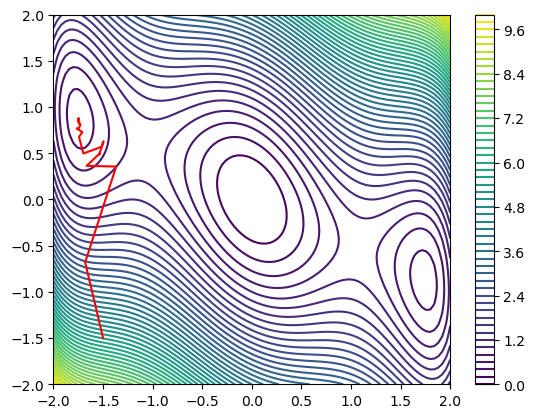

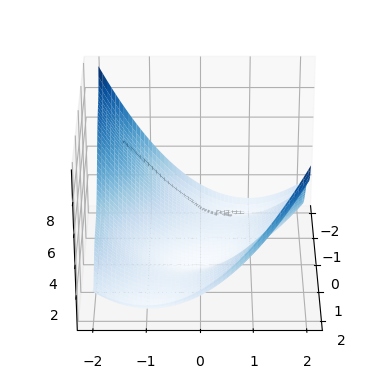

In [17]:
original_point = np.array([-1.5, -1.5])

# SGD optimization and draw path
step_size = 0.1
tol = 1e-5
res = sgd(Camel, Camel_grad, original_point, step_size, tol, stochastic_injection=1)
print({
        "x": res["x"],
        "evaluation": res["evaluation"],
    })

draw_path(Camel, path=res["path"], x_min=-2, x_max=2, y_min=-2, y_max=2)
draw_path_3d(Camel, path=res["path"], min=-2, max=2, o_x=30, o_y=0)

In [18]:
original_point = np.array([-1.5, -1.5])

starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]

global_minimum = np.array([0.0, 0.0])

In [19]:
# test different minimization algorithms for different starting points

# test for stochastic gradient descent
print("\nTests for stochastic gradient descent: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(sgd, args=({'func': Camel, 'starting_point': starting_point, 'first_derivative': Camel_grad, 'step_size': 0.1, 'tol': tol, 'stochastic_injection': 1}), times=100, global_minimum=global_minimum)

# test for CG
print("\nTests for CG: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(minimize, args=({'fun': Camel, 'x0': starting_point, 'method': 'CG', 'jac': Camel_grad, 'tol': tol}), times=100, global_minimum=global_minimum)

# test for BFGS
print("\nTests for BFGS: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(minimize, args=({'fun': Camel, 'x0': starting_point, 'method': 'BFGS', 'jac': Camel_grad, 'tol': tol}), times=100, global_minimum=global_minimum)


Tests for stochastic gradient descent: 
starting_point: [-1.5 -1.5]
Running 100 times: reach global minimum 64 times, average 35 steps with variance 7.63
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 33 steps with variance 7.14
starting_point: [-1.  1.]
Running 100 times: reach global minimum 40 times, average 36 steps with variance 5.95
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 18 times, average 35 steps with variance 7.12

Tests for CG: 
starting_point: [-1.5 -1.5]
Running 100 times: reach global minimum 0 times
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 6 steps with variance 0.00
starting_point: [-1.  1.]
Running 100 times: reach global minimum 0 times
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 0 times

Tests for BFGS: 
starting_point: [-1.5 -1.5]
Running 100 times: reach global minimum 0 times
starting_point: [0. 1.]
Running 100 times: reach global minimum 10

**ANSWER:** Here, we have a function with three local minima. The results of CG and BFGS will highly depend on the starting point. They are optimal methods for finding local minima but not for global minima. We can easily see it with the results of the tests: they can find the global minimum for only one starting point out of four. On the contrary, thanks to the added noise, the SGD can reach more times the global minimum, which makes it a better solution in the case of this function. 

## (b)

*For debugging*: This is a stochastic method so your outputs may vary. For SGDM, it takes ~200 steps to converge and it takes ~0.02 sec

In [20]:
# @timeit
def sgdm(func, first_derivative, starting_point, step_size, tol, stochastic_injection=0, momentum=0):
    """
    Stochastic Gradient Descent with Momentum
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    momentum: float
        Momentum (\eta) value in SGDM algorithm
    
    Returns
    -------
    res: dict
        Optimization result
    """
    
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    previous_direction = np.zeros(len(starting_point))
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            # formulate a stochastic_deriv (random vector) 
            # that is the same norm as your gradient 
            noise = np.random.normal(size=deriv.shape)
            stochastic_deriv = noise / np.linalg.norm(noise) * np.linalg.norm(deriv)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        
        # new direction 
        direction = - (deriv + stochastic_injection * stochastic_deriv) + momentum * previous_direction
        
        # calculate new point, don't forget momentum!
        new_point = starting_point + step_size * direction

        if func(new_point) < func(starting_point):
            # good step
            visited.append(starting_point)
            starting_point = new_point
            deriv = first_derivative(starting_point)
            previous_direction = direction
            step_size *= 1.2
        else:
            # bad step
            if step_size < 1e-5:
                # step size too small, zero out the previous direction
                # since we know it is a bad direction
                previous_direction = np.zeros(len(starting_point))
            else:
                step_size *= 0.5
        count += 1
    
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }


{'x': array([-2.11552853e-06,  5.58500174e-06]), 'evaluation': 2.8327935855811457e-11}
Length of the path: 288
Length of the path: 288


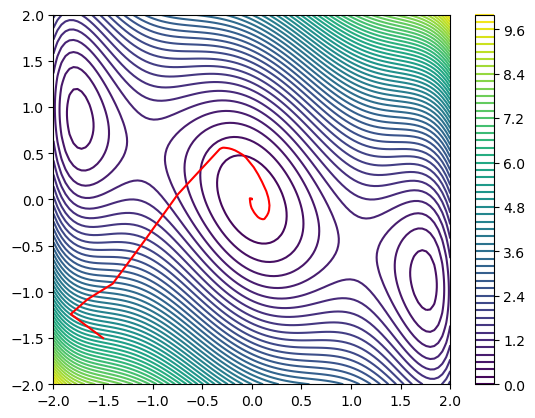

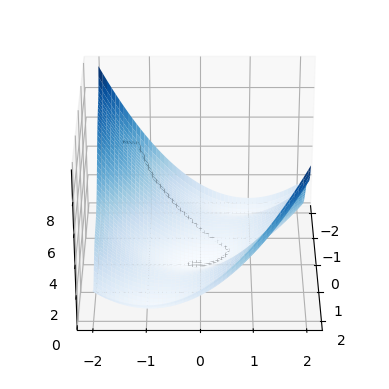

In [21]:
# test SGDM
original_point = np.array([-1.5, -1.5])
step_size = 0.1
tol = 1e-5
momentum = 0.9
result = sgdm(Camel, Camel_grad, original_point, step_size, tol, stochastic_injection=1, momentum=momentum)
print({
        "x": result["x"],
        "evaluation": result["evaluation"],
    })

draw_path(Camel, path=result["path"], x_min=-2, x_max=2, y_min=-2, y_max=2)
draw_path_3d(Camel, path=result["path"], min=-2, max=2, o_x=30, o_y=0)

In [22]:
# test for stochastic gradient descent
print("\nTests for stochastic gradient descent: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(sgd, args=({'func': Camel, 'starting_point': starting_point, 'first_derivative': Camel_grad, 'step_size': 0.1, 'tol': tol, 'stochastic_injection': 1}), times=100, global_minimum=global_minimum)

# test for SGDM
print("\nTests for the SGDM: ")
for starting_point in starting_points:
    print(f"starting_point: {starting_point}")
    statistics_test(sgdm, args=({'func': Camel, 'starting_point': starting_point, 'first_derivative': Camel_grad, 'step_size': 0.1, 'tol': tol, 'stochastic_injection': 1, 'momentum': 0.9}), times=100, global_minimum=global_minimum)


Tests for stochastic gradient descent: 
starting_point: [-1.5 -1.5]
Running 100 times: reach global minimum 70 times, average 34 steps with variance 6.99
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 32 steps with variance 6.81
starting_point: [-1.  1.]
Running 100 times: reach global minimum 45 times, average 37 steps with variance 6.28
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 20 times, average 37 steps with variance 6.43

Tests for the SGDM: 
starting_point: [-1.5 -1.5]
Running 100 times: reach global minimum 47 times, average 233 steps with variance 33.30
starting_point: [0. 1.]
Running 100 times: reach global minimum 100 times, average 217 steps with variance 30.73
starting_point: [-1.  1.]
Running 100 times: reach global minimum 41 times, average 220 steps with variance 35.01
starting_point: [1.5 0.5]
Running 100 times: reach global minimum 27 times, average 239 steps with variance 36.36


**ANSWER:** On average, the SGDM performs better than CG and BFGS for the same reasons as the SGD. However, it underperforms the SGD methods in terms of the number of steps. An explanation is that SGDM uses a momentum term that might lead to oscillations between the multiple minima, making it slower to converge.